# 1. Setup

In [127]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

import tensorflow as tf

In [128]:
print('numpy version === ' + np.__version__)
print('matplotlib version === ' + matplotlib.__version__)
print('pandas version === ' + pd.__version__)
print('seaborn version === ' + sns.__version__)

print('tensorflow version === ' + tf.__version__)


numpy version === 1.26.4
matplotlib version === 3.9.2
pandas version === 2.2.3
seaborn version === 0.13.2
tensorflow version === 2.18.0


# 2. Data Preparation

In [129]:
data = pd.read_csv('./bank+marketing/bank-additional/bank-additional/bank-additional-full.csv', sep=';') # row_count = 41188
# data = pd.read_csv('./bank+marketing/bank-additional/bank-additional/bank-additional.csv', sep=';') # row_count = 4119
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

   5 - default: has credit in default? (categorical: "no","yes","unknown")

   6 - housing: has housing loan? (categorical: "no","yes","unknown")

   7 - loan: has personal loan? (categorical: "no","yes","unknown")

## Related with the last contact of the current campaign:

   8 - contact: contact communication type (categorical: "cellular","telephone")

   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:

  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

  14 - previous: number of contacts performed before this campaign and for this client (numeric)

  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

## Social and economic context attributes

  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     

  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     

  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

  20 - nr.employed: number of employees - quarterly indicator (numeric)


## Output variable (desired target):

  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [131]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Data Cleaning

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label.

In [132]:
def data_detail(data):
    column_info = {
        "Column Name": data.columns,
        "Non-Null Count": data.notnull().sum().values,
        "Data Type": data.dtypes.values,
        "'unknown' Count": (data == 'unknown').sum().values,
        "Null Value Count": data.isnull().sum().values, 
        "Unique Value Count": [data[col].nunique() if data[col].dtype == 'object' else None for col in data.columns]
    }
    
    info_table = pd.DataFrame(column_info)
    print(info_table)

In [133]:
data_detail(data)

       Column Name  Non-Null Count Data Type  'unknown' Count  \
0              age           41188     int64                0   
1              job           41188    object              330   
2          marital           41188    object               80   
3        education           41188    object             1731   
4          default           41188    object             8597   
5          housing           41188    object              990   
6             loan           41188    object              990   
7          contact           41188    object                0   
8            month           41188    object                0   
9      day_of_week           41188    object                0   
10        duration           41188     int64                0   
11        campaign           41188     int64                0   
12           pdays           41188     int64                0   
13        previous           41188     int64                0   
14        poutcome       

In [134]:
data.replace('unknown', np.nan, inplace=True)
data_detail(data)

       Column Name  Non-Null Count Data Type  'unknown' Count  \
0              age           41188     int64                0   
1              job           40858    object                0   
2          marital           41108    object                0   
3        education           39457    object                0   
4          default           32591    object                0   
5          housing           40198    object                0   
6             loan           40198    object                0   
7          contact           41188    object                0   
8            month           41188    object                0   
9      day_of_week           41188    object                0   
10        duration           41188     int64                0   
11        campaign           41188     int64                0   
12           pdays           41188     int64                0   
13        previous           41188     int64                0   
14        poutcome       

**Removing the entries where 'job' and 'marital' are 'unknown'.**

- The total number of rows with `'unknown'` in the `'job'` column is **330**.
- The total number of rows with `'unknown'` in the `'marital'` column is **80**.
- Therefore, the combined total number of rows removed due to `'unknown'` values in these columns is **420**.
- Total entries in the database is **41,188**. (Removed percentage ~ **1%**)


In [135]:
data = data.dropna(subset=['job', 'marital'])
data_detail(data)

       Column Name  Non-Null Count Data Type  'unknown' Count  \
0              age           40787     int64                0   
1              job           40787    object                0   
2          marital           40787    object                0   
3        education           39191    object                0   
4          default           32351    object                0   
5          housing           39803    object                0   
6             loan           39803    object                0   
7          contact           40787    object                0   
8            month           40787    object                0   
9      day_of_week           40787    object                0   
10        duration           40787     int64                0   
11        campaign           40787     int64                0   
12           pdays           40787     int64                0   
13        previous           40787     int64                0   
14        poutcome       

In [136]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


## Encoding categorical variables

### Apply 0/1 Encoding for 'yes/no' categorical data columns.



In [137]:
print(data['default'].unique())
print(data['housing'].unique())
print(data['loan'].unique())
print(data['y'].unique())


['no' nan 'yes']
['no' 'yes' nan]
['no' 'yes' nan]
['no' 'yes']


In [138]:
data['default'] = data['default'].replace({'yes': 1, 'no': 0})
data['housing'] = data['housing'].replace({'yes': 1, 'no': 0})
data['loan'] = data['loan'].replace({'yes': 1, 'no': 0})
data['y'] = data['y'].replace({'yes': 1, 'no': 0})

C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\471439046.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['default'] = data['default'].replace({'yes': 1, 'no': 0})
C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\471439046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['default'] = data['default'].replace({'yes': 1, 'no': 0})
C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\471439046.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future vers

### Lable Encoding for contact, marital, poutcome

In [139]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [140]:
print('=====Unique value of catagorical coulumns======')
print(data['contact'].unique())
print(data['marital'].unique())
print(data['poutcome'].unique())

print('\n')

print(data['month'].unique())
print(data['day_of_week'].unique())

print('\n')

print(data['education'].unique())
print(data['job'].unique())


=====Unique value of catagorical coulumns======
['telephone' 'cellular']
['married' 'single' 'divorced']
['nonexistent' 'failure' 'success']


['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']


['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course' nan
 'university.degree' 'illiterate']
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']


In [141]:
data['contact'] = data['contact'].replace({'cellular': 1, 'telephone': 0})
data['marital'] = data['marital'].replace({'married': 0, 'single': 1, 'divorced':2})
data['poutcome'] = data['poutcome'].replace({'failure': 0, 'nonexistent': 1, 'success':2})

C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\3289617441.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contact'] = data['contact'].replace({'cellular': 1, 'telephone': 0})
C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\3289617441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['contact'] = data['contact'].replace({'cellular': 1, 'telephone': 0})
C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\3289617441.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will 

### Cyclic Encoding for Month and Day of the Week (Time)

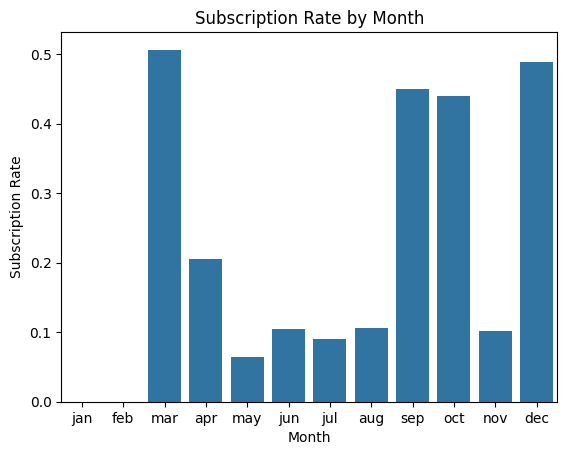

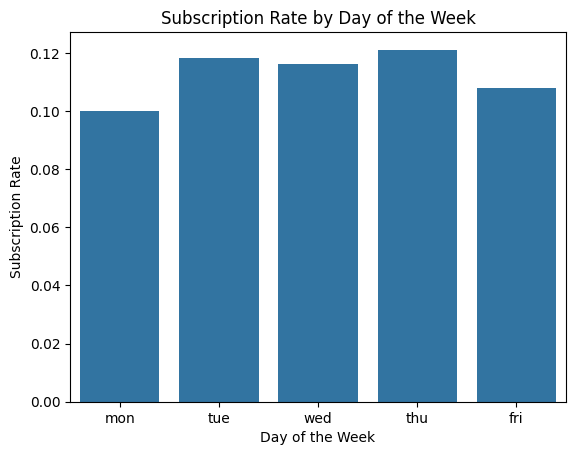

In [142]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

month_analysis = data.groupby('month', observed=False)['y'].value_counts(normalize=True).unstack()[1] # 1 = yes

day_analysis = data.groupby('day_of_week', observed=False)['y'].value_counts(normalize=True).unstack()[1] # 1 = yes

sns.barplot(x=month_analysis.index, y=month_analysis.values, order=month_order)
plt.title('Subscription Rate by Month')
plt.xlabel('Month')
plt.ylabel('Subscription Rate')
plt.show()

sns.barplot(x=day_analysis.index, y=day_analysis.values, order=day_order)
plt.title('Subscription Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Subscription Rate')
plt.show()

In [143]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# data = pd.DataFrame({'month': months})

data['month_num'] = data['month'].map(month_mapping)

data['sin_month'] = np.sin(2 * np.pi * (data['month_num'] - 1) / 12)
data['cos_month'] = np.cos(2 * np.pi * (data['month_num'] - 1) / 12)


# plt.figure(figsize=(3, 3))

# plt.scatter(data['sin_month'], data['cos_month'])

# for i, month in enumerate(data['month']):
#     plt.text(data['sin_month'][i], data['cos_month'][i], month)

# plt.title('Cyclic Encoding: sin_month vs cos_month')

# plt.axis('equal')
# plt.grid(True)
# plt.show()

data = data.drop(columns=['month', 'month_num'])



C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\285050142.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_num'] = data['month'].map(month_mapping)
C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\285050142.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sin_month'] = np.sin(2 * np.pi * (data['month_num'] - 1) / 12)
C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\285050142.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [144]:
day_of_week_mapping = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5
}

data['day_of_week_num'] = data['day_of_week'].map(day_of_week_mapping)

data['sin_day_of_week'] = np.sin(2 * np.pi * (data['day_of_week_num'] - 1) / 5)
data['cos_day_of_week'] = np.cos(2 * np.pi * (data['day_of_week_num'] - 1) / 5)



# plt.scatter(data['sin_day_of_week'], data['cos_day_of_week'])

# for i, day in enumerate(data['day_of_week']):
#     plt.text(data['sin_day_of_week'].iloc[i], data['cos_day_of_week'].iloc[i], day)

# plt.title('Cyclic Encoding: sin_day_of_week vs cos_day_of_week')
# plt.xlabel('sin_day_of_week')
# plt.ylabel('cos_day_of_week')
# plt.axis('equal')
# plt.grid(True)
# plt.show()

data = data.drop(columns=['day_of_week', 'day_of_week_num'])


### Lable Encoding for education

education
university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
illiterate                18
Name: count, dtype: int64


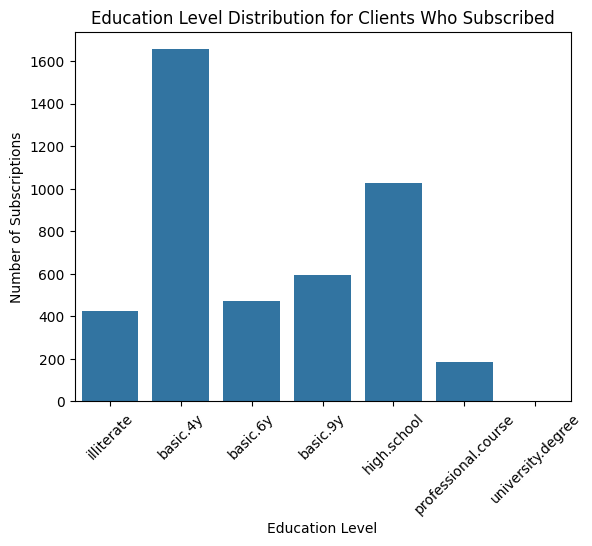

In [145]:
print(data['education'].value_counts())

education_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6
}
subscribed_data = data[data['y'] == 1]

sns.countplot(x='education', data=subscribed_data)

plt.title('Education Level Distribution for Clients Who Subscribed')
plt.xlabel('Education Level')
plt.ylabel('Number of Subscriptions')
plt.xticks(ticks=range(len(education_mapping)), labels=education_mapping.keys(), rotation=45)

plt.show()

Ranking for Lable Encoding

    'illiterate': 0, 
    'basic.4y': 1, 
    'basic.6y':2, 
    'basic.9y':3, 
    'high.school':4, 
    'professional.course':5, 
    'university.degree':6

In [146]:
data['education'] = data['education'].replace({'illiterate': 0, 'basic.4y': 1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'professional.course':5, 'university.degree':6})

C:\Users\Buddhini\AppData\Local\Temp\ipykernel_13780\130906714.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['education'] = data['education'].replace({'illiterate': 0, 'basic.4y': 1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'professional.course':5, 'university.degree':6})


### One-Hot Encoding for Job

0
job
admin.           10408
blue-collar       9240
technician        6731
services          3963
management        2921
retired           1715
entrepreneur      1453
self-employed     1416
housemaid         1057
unemployed        1009
student            874
Name: count, dtype: int64


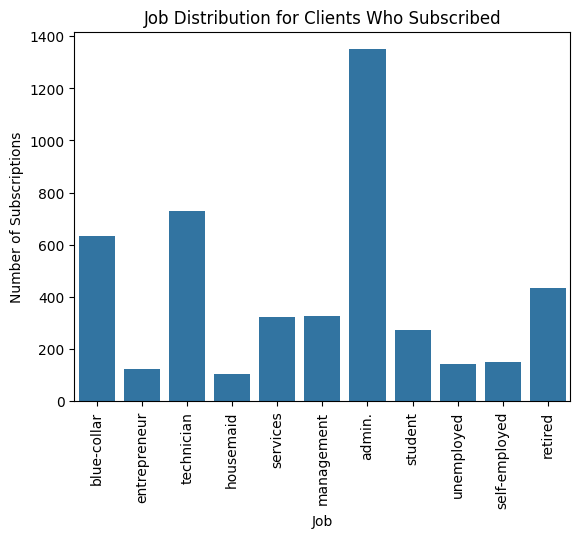

In [147]:
print(data['job'].isnull().sum())

print(data['job'].value_counts())

subscribed_data = data[data['y'] == 1]
subscribed_data = subscribed_data[subscribed_data['job'].notna()]

sns.countplot(x='job', data=subscribed_data)

plt.title('Job Distribution for Clients Who Subscribed')
plt.xlabel('Job')
plt.ylabel('Number of Subscriptions')

plt.xticks(rotation=90)

plt.show()

In [148]:
data_encoded = pd.get_dummies(data, columns=['job'], drop_first=False)
job_columns = [col for col in data_encoded.columns if col.startswith('job_')]  # Identify job-related columns
data_encoded[job_columns] = data_encoded[job_columns].astype(int)
data_encoded.head()

,age,marital,education,default,housing,loan,contact,duration,campaign,pdays,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,0,1.0,0.0,0.0,0.0,0,261,1,999,...,0,0,1,0,0,0,0,0,0,0
1,57,0,4.0,NaN,0.0,0.0,0,149,1,999,...,0,0,0,0,0,0,1,0,0,0
2,37,0,4.0,0.0,1.0,0.0,0,226,1,999,...,0,0,0,0,0,0,1,0,0,0
3,40,0,2.0,0.0,0.0,0.0,0,151,1,999,...,0,0,0,0,0,0,0,0,0,0
4,56,0,4.0,0.0,0.0,1.0,0,307,1,999,...,0,0,0,0,0,0,1,0,0,0


In [149]:
data_detail(data_encoded)

          Column Name  Non-Null Count Data Type  'unknown' Count  \
0                 age           40787     int64                0   
1             marital           40787     int64                0   
2           education           39191   float64                0   
3             default           32351   float64                0   
4             housing           39803   float64                0   
5                loan           39803   float64                0   
6             contact           40787     int64                0   
7            duration           40787     int64                0   
8            campaign           40787     int64                0   
9               pdays           40787     int64                0   
10           previous           40787     int64                0   
11           poutcome           40787     int64                0   
12       emp.var.rate           40787   float64                0   
13     cons.price.idx           40787   float64 

### Handling Missing Values

In [150]:
data_detail(data_encoded)

          Column Name  Non-Null Count Data Type  'unknown' Count  \
0                 age           40787     int64                0   
1             marital           40787     int64                0   
2           education           39191   float64                0   
3             default           32351   float64                0   
4             housing           39803   float64                0   
5                loan           39803   float64                0   
6             contact           40787     int64                0   
7            duration           40787     int64                0   
8            campaign           40787     int64                0   
9               pdays           40787     int64                0   
10           previous           40787     int64                0   
11           poutcome           40787     int64                0   
12       emp.var.rate           40787   float64                0   
13     cons.price.idx           40787   float64 

In [151]:
from sklearn.impute import KNNImputer

# Initialize KNNImputer with k=5
knn_imputer = KNNImputer(n_neighbors=5)

# Select only numeric columns for imputation
data_to_impute = data_encoded.select_dtypes(include=['float64', 'int64', 'int32'])
data_to_impute
# # Perform KNN imputation
imputed_data = knn_imputer.fit_transform(data_to_impute)


ModuleNotFoundError: No module named 'sklearn'

In [24]:
data_imputed = pd.DataFrame(imputed_data, columns=data_to_impute.columns)
data_imputed


,age,marital,education,default,housing,loan,contact,duration,campaign,pdays,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56.0,0.0,1.0,0.0,0.0,0.0,0.0,261.0,1.0,999.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57.0,0.0,4.0,0.0,0.0,0.0,0.0,149.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37.0,0.0,4.0,0.0,1.0,0.0,0.0,226.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40.0,0.0,2.0,0.0,0.0,0.0,0.0,151.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,56.0,0.0,4.0,0.0,0.0,1.0,0.0,307.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40782,73.0,0.0,5.0,0.0,1.0,0.0,1.0,334.0,1.0,999.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40783,46.0,0.0,5.0,0.0,0.0,0.0,1.0,383.0,1.0,999.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40784,56.0,0.0,6.0,0.0,1.0,0.0,1.0,189.0,2.0,999.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40785,44.0,0.0,5.0,0.0,0.0,0.0,1.0,442.0,1.0,999.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
data_detail(data_imputed)

          Column Name  Non-Null Count Data Type  'unknown' Count  \
0                 age           40787   float64                0   
1             marital           40787   float64                0   
2           education           40787   float64                0   
3             default           40787   float64                0   
4             housing           40787   float64                0   
5                loan           40787   float64                0   
6             contact           40787   float64                0   
7            duration           40787   float64                0   
8            campaign           40787   float64                0   
9               pdays           40787   float64                0   
10           previous           40787   float64                0   
11           poutcome           40787   float64                0   
12       emp.var.rate           40787   float64                0   
13     cons.price.idx           40787   float64 